# project-01 
### Leah Latham, Jonah Foeday, Manroop Gill, Murtatha Alwan, & Alicia Hill

In [6]:
# Import dependencies
import hvplot.pandas
import json
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pathlib import Path
from pprint import pprint
import requests
import scipy.stats as st
from config import api_key

# File path
file = Path("Resources/Latest_Data_Science_Salaries.csv")

# Read file
ds_df = pd.read_csv(file, encoding='UTF-8')

# Display file head()
ds_df.head()

,Job Title,Employment Type,Experience Level,Expertise Level,Salary,Salary Currency,Company Location,Salary in USD,Employee Residence,Company Size,Year
0,Data Engineer,Full-Time,Senior,Expert,210000,United States Dollar,United States,210000,United States,Medium,2023
1,Data Engineer,Full-Time,Senior,Expert,165000,United States Dollar,United States,165000,United States,Medium,2023
2,Data Engineer,Full-Time,Senior,Expert,185900,United States Dollar,United States,185900,United States,Medium,2023
3,Data Engineer,Full-Time,Senior,Expert,129300,United States Dollar,United States,129300,United States,Medium,2023
4,Data Scientist,Full-Time,Senior,Expert,140000,United States Dollar,United States,140000,United States,Medium,2023


### 1. How have data science salaries changed over time?

In [7]:
# Identify top 5 countries (highest volume)
countries = ds_df["Company Location"].value_counts()
top_5_countries = countries.head(5)
top_5_countries_list = top_5_countries.index.to_list()
countries_list = top_5_countries.index.to_list()

# create lists for each country's averages over 4 years
top_avg_list = []
for country in top_5_countries_list:
    one_country = ds_df.loc[(ds_df["Company Location"] == country), :]
    one_country_year = one_country.groupby(["Year"])["Salary in USD"].mean()
    top_avg_list.append(one_country_year)

top_5_countries_list[0] = list(top_avg_list[0])
top_5_countries_list[1] = list(top_avg_list[1])
top_5_countries_list[2] = list(top_avg_list[2])
top_5_countries_list[3] = list(top_avg_list[3])
top_5_countries_list[4] = list(top_avg_list[4])

In [8]:
# Identify company sizes  (DO WE HAVE RANGES FOR COMPANY SIZE)
company_size = ds_df["Company Size"].value_counts()
company_size_list01 = company_size.index.to_list()
company_size_names = company_size.index.to_list()
company_size_list01.sort()
company_size_names.sort()
print(company_size_names)

# create lists for each company size's averages over 4 years
company_size_list = []
for value in company_size_list01:
    one_size = ds_df.loc[(ds_df["Company Size"] == value), :]
    one_size_year = one_size.groupby(["Year"])["Salary in USD"].mean()
    print(one_size_year)
    company_size_list.append(one_size_year)

company_size_list01[0] = list(company_size_list[0])
company_size_list01[1] = list(company_size_list[1])
company_size_list01[2] = list(company_size_list[2])



['Large', 'Medium', 'Small']
Year
2020    116419.818182
2021    108633.214876
2022    119868.169697
2023    123987.495935
Name: Salary in USD, dtype: float64
Year
2020    113195.058824
2021     84363.326923
2022    136232.532338
2023    156959.574155
Name: Salary in USD, dtype: float64
Year
2020    76430.086957
2021    90732.523810
2022    88386.744681
2023    89043.717949
Name: Salary in USD, dtype: float64


In [9]:
years = ds_df["Year"].unique()
years.sort()
years_list = list(years)
years_list

[2020, 2021, 2022, 2023]

Text(0, 0.5, 'Salary (USD)')

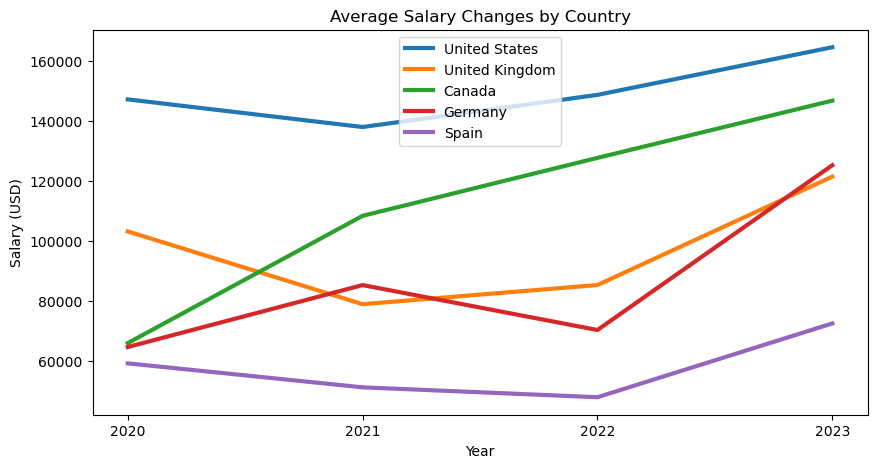

In [10]:
# Create line graph showing average salary over time by top 5 countries
plt.figure(figsize=(10,5))
plt.plot(years_list, top_5_countries_list[0], linewidth=3, label=countries_list[0])
plt.plot(years_list, top_5_countries_list[1], linewidth=3, label=countries_list[1])
plt.plot(years_list, top_5_countries_list[2], linewidth=3, label=countries_list[2])
plt.plot(years_list, top_5_countries_list[3], linewidth=3, label=countries_list[3])
plt.plot(years_list, top_5_countries_list[4], linewidth=3, label=countries_list[4])
plt.legend(loc="best")
tick_locations = [value for value in years_list]
plt.xticks(tick_locations, years_list)
plt.title("Average Salary Changes by Country")
plt.xlabel("Year")
plt.ylabel("Salary (USD)")

# Save graph


# Show graph

In [11]:
#chi-squared

Text(0, 0.5, 'Salary (USD)')

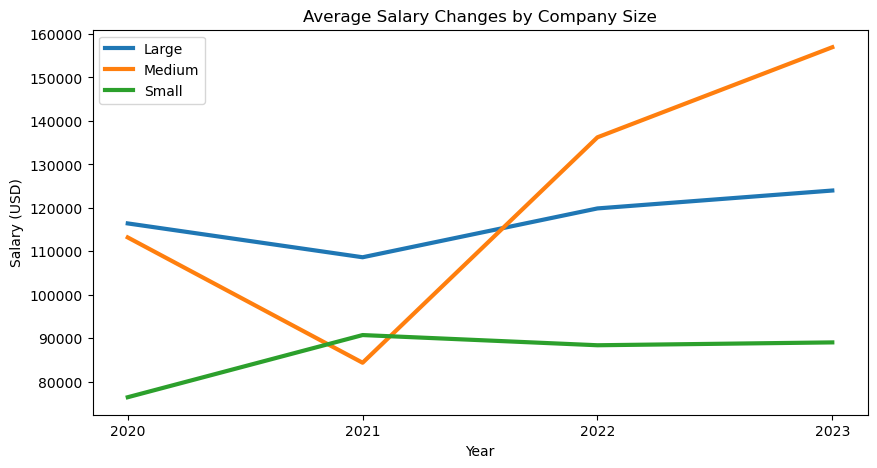

In [12]:
# Create line graph showing average salary over time by company size
plt.figure(figsize=(10,5))
plt.plot(years_list, company_size_list01[0], linewidth=3, label=company_size_names[0])
plt.plot(years_list, company_size_list01[1], linewidth=3, label=company_size_names[1])
plt.plot(years_list, company_size_list01[2], linewidth=3, label=company_size_names[2])
plt.legend(loc="best")
tick_locations = [value for value in years_list]
plt.xticks(tick_locations, years_list)
plt.title("Average Salary Changes by Company Size")
plt.xlabel("Year")
plt.ylabel("Salary (USD)")

# Save graph


# Show graph


### 2. What is the breakdown of experience level required?

Text(0.5, 1.0, 'Data Science Jobs by Experience Required')

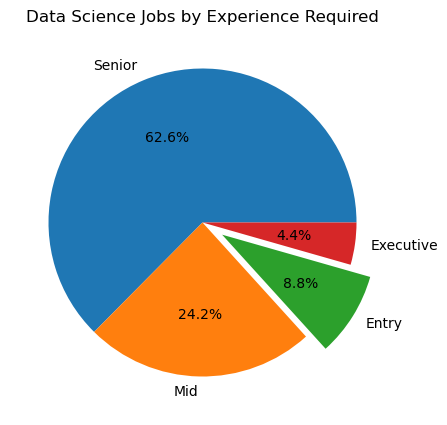

In [13]:
# Value_count experience level
experience = ds_df["Experience Level"].value_counts()
experience_names = experience.index.to_list()

# Create pie chart to display breakdown (explode 'entry'?)
explode = [0, 0, 0.15, 0]
plt.figure(figsize=(5,5))
plt.pie(experience, labels=experience_names, explode=explode, autopct="%1.1f%%")
plt.title("Data Science Jobs by Experience Required")


### 3. How do data science salaries vary by job title and experience level?

In [14]:
# Identify top 5 job titles (highest volume)
jobs = ds_df["Job Title"].value_counts()
top_5_jobs = jobs.head(5)
top_5_jobs_list = top_5_jobs.index.to_list()

job_0 = top_5_jobs_list[0]
job_1 = top_5_jobs_list[1]
job_2 = top_5_jobs_list[2]
job_3 = top_5_jobs_list[3]
job_4 = top_5_jobs_list[4]

# Create lists of salaries for each top 5 job title
job_avg_list = []
for job in top_5_jobs_list:
    one_job = ds_df.loc[(ds_df["Job Title"] == job), :]
    one_job_year = one_country.groupby(["Year"])["Salary in USD"].mean()
    job_avg_list.append(one_job_year)

top_5_jobs_list[0] = list(job_avg_list[0])
top_5_jobs_list[1] = list(job_avg_list[1])
top_5_jobs_list[2] = list(job_avg_list[2])
top_5_jobs_list[3] = list(job_avg_list[3])
top_5_jobs_list[4] = list(job_avg_list[4])

In [15]:
# DataFrame with top 5 jobs (by volume)
top_5_jobs_df = ds_df.loc[(ds_df["Job Title"] == job_0) | (ds_df["Job Title"] == job_1) | (ds_df["Job Title"] == job_2) | (ds_df["Job Title"] == job_3) | (ds_df["Job Title"] == job_4), :]

# Create summary statistics for top 5 job titles
# Mean, Median, Variance, Std Deviation, SEM
jobs_mean = top_5_jobs_df.groupby(["Job Title"])["Salary in USD"].mean()
jobs_median = top_5_jobs_df.groupby(["Job Title"])["Salary in USD"].median()
jobs_var = top_5_jobs_df.groupby(["Job Title"])["Salary in USD"].var()
jobs_stddev = top_5_jobs_df.groupby(["Job Title"])["Salary in USD"].std()
jobs_sem = top_5_jobs_df.groupby(["Job Title"])["Salary in USD"].sem()

# Merge into single DataFrame
jobs_merge_01 = pd.merge(jobs_mean, jobs_median, on="Job Title", how="left")
jobs_merge_02 = pd.merge(jobs_var, jobs_stddev, on="Job Title", how="left")
jobs_merge_03 = pd.merge(jobs_merge_01, jobs_merge_02, on="Job Title", how="left")
jobs_merge_rename = jobs_merge_03.rename(columns={"Salary in USD_x_x": "Mean", "Salary in USD_y_x": "Median", "Salary in USD_x_y": "Variance", "Salary in USD_y_y": "Std. Deviation"})
jobs_merge_04 = pd.merge(jobs_merge_rename, jobs_sem, on="Job Title", how="left")
jobs_summary_stats = jobs_merge_04.rename(columns={"Salary in USD": "SEM"})

# Formatting
jobs_summary_stats["Mean"] = jobs_summary_stats["Mean"].map("${:,.2f}".format)
jobs_summary_stats["Median"] = jobs_summary_stats["Median"].map("${:,.2f}".format)
jobs_summary_stats["Variance"] = jobs_summary_stats["Variance"].map("{:,.2f}".format)
jobs_summary_stats["Std. Deviation"] = jobs_summary_stats["Std. Deviation"].map("${:,.2f}".format)
jobs_summary_stats["SEM"] = jobs_summary_stats["SEM"].map("${:,.2f}".format)
jobs_summary_stats

,Mean,Median,Variance,Std. Deviation,SEM
Job Title,,,,,
Analytics Engineer,"$154,258.96","$149,400.00","3,383,133,047.36","$58,164.71","$5,062.59"
Data Analyst,"$109,500.38","$105,320.00","2,642,872,303.05","$51,408.87","$2,399.56"
Data Engineer,"$142,033.87","$135,223.00","4,019,691,477.38","$63,401.04","$2,392.92"
Data Scientist,"$141,886.16","$140,000.00","4,436,580,684.95","$66,607.66","$2,643.24"
Machine Learning Engineer,"$167,249.51","$161,310.00","5,095,864,503.89","$71,385.32","$4,121.43"


<Axes: title={'center': 'Salary in USD'}, xlabel='Job Title'>

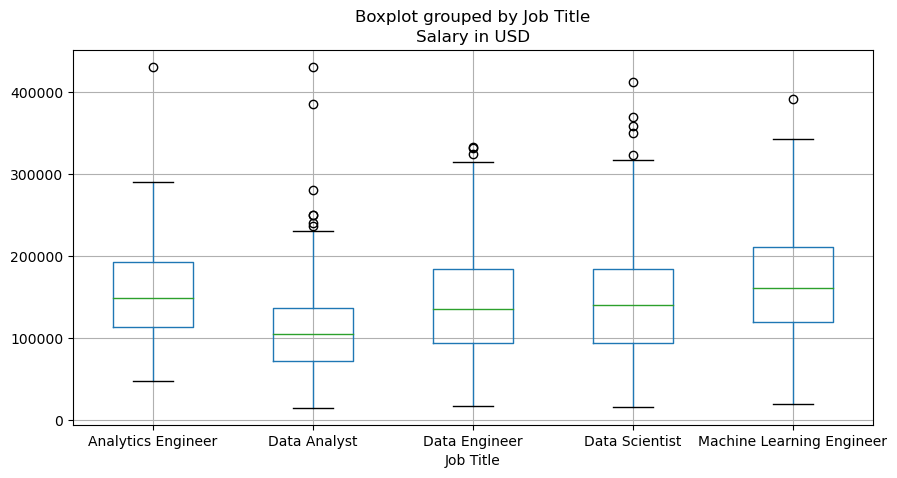

In [16]:
# Create boxplots showing salary information for top 5 job titles
top_5_jobs_df.boxplot("Salary in USD", by="Job Title", figsize=(10,5))

# Save graph


# Show graph

In [17]:
# ANOVA

In [18]:
# Create lists of salaries for each experience level

In [19]:
# Create summary statistics for experience levels
# Mean, Median, Variance, Std Deviation, SEM


<Axes: title={'center': 'Salary in USD'}, xlabel='Experience Level'>

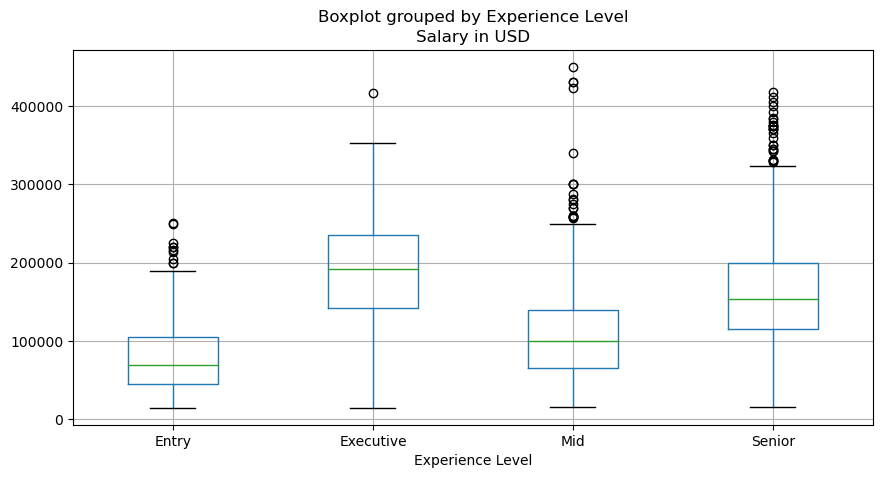

In [20]:
# Create boxplots showing salary information by experience level
ds_df.boxplot("Salary in USD", by="Experience Level", figsize=(10,5))

# Save graph


# Show graph


In [21]:
# ANOVA

### 4. Do US companies hire US residents and do US residents work for US companies?

In [22]:
# .loc US companies and add columns for lat/lon for employee residence location
us_companies_df = ds_df.loc[(ds_df["Company Location"] == "United States"), :]
us_company_df = pd.DataFrame(us_companies_df["Employee Residence"])

# Creates DataFrame for lat/lon identification, to be used for looping
us_company_df_unique_01 = pd.DataFrame(us_company_df["Employee Residence"].unique())
us_company_df_unique_01["Lat"] = ""
us_company_df_unique_01["Lon"] = ""
us_company_df_unique = us_company_df_unique_01.rename(columns={0: "Employee Residence"})

# Identify lat/lon for each row using geoapify
# Reference class activies and API Challenge (#6)

# Geoapify parameters
params = {
    "apiKey":api_key,
    "format":"json"
}

# Base URL
base_url = "https://api.geoapify.com/v1/geocode/search"

print("---------------------------------")
print("Starting coordinate search...")
print("---------------------------------")
print(" ")
# Loop through DataFrame to identify Latitude and Longitude
for index, row in us_company_df_unique.iterrows():
    country = row[0]

    # Ammend parameters
    params["text"] = f"{country}"

    # Make API Request
    try:
        response = requests.get(base_url, params=params).json()
        us_company_df_unique.loc[index, "Lat"] = response["results"][0]["lat"]
        us_company_df_unique.loc[index, "Lon"] = response["results"][0]["lon"]
        print(f"Coordinates for {country} fetched...")
    except:
        print(f"Coordinates for {country} UNAVAILABLE, NEEDS REVIEW!")
    
# Narrow columns to relevant
print(" ")
print("---------------------------------")
print("Coordinate search completed")
print("---------------------------------")

---------------------------------
Starting coordinate search...
---------------------------------
 
Coordinates for United States fetched...
Coordinates for Belgium fetched...
Coordinates for Turkey fetched...
Coordinates for Nigeria fetched...
Coordinates for Ghana fetched...
Coordinates for India fetched...
Coordinates for Egypt fetched...
Coordinates for Uzbekistan fetched...
Coordinates for Argentina fetched...
Coordinates for Germany fetched...
Coordinates for France fetched...
Coordinates for Portugal fetched...
Coordinates for Kuwait fetched...
Coordinates for Spain fetched...
Coordinates for China fetched...
Coordinates for Costa Rica fetched...
Coordinates for Chile fetched...
Coordinates for Bolivia, Plurinational State of fetched...
Coordinates for Malaysia fetched...
Coordinates for Brazil fetched...
Coordinates for Russian Federation fetched...
Coordinates for Canada fetched...
Coordinates for Viet Nam fetched...
Coordinates for Greece fetched...
Coordinates for Bulgaria f

In [23]:
#Identifies count of countries of residence for Employees
us_company_count = us_companies_df.groupby(["Employee Residence"])["Employee Residence"].count()
us_company_count_df = pd.DataFrame(us_company_count).rename(columns={"Employee Residence": "Count"})

# Merge country count for sizing on map
us_company_merged = pd.merge(us_company_df_unique, us_company_count_df, on="Employee Residence", how="left")
us_company_merged = us_company_merged[["Employee Residence", "Lat", "Lon", "Count"]]

In [24]:
# Graph map of US companies employee residence location
# NEED TO LOOK UP HOW TO ADD A TITLE
us_residents_map_plot = us_company_merged.hvplot.points(
    "Lon",
    "Lat",
    geo=True,
    tiles="OSM",
    title="Employee Residence for US Companies",
    xlabel="LATITUDE",
    ylabel="LONGITUDE",
    frame_width=750,
    frame_height=500,
    size="Count",
    scale=3,
    color="Employee Residence",
    muted_color="Employee Residence",
    alpha=0.6
)

# Save image
us_residents_map_plot

C:\Users\Manro\anaconda3\envs\dev\lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,
C:\Users\Manro\anaconda3\envs\dev\lib\site-packages\geoviews\operation\__init__.py:14: HoloviewsDeprecationWarning: 'ResamplingOperation' is deprecated and will be removed in version 1.17, use 'ResampleOperation2D' instead.
  from holoviews.operation.datashader import (


:Overlay
   .Tiles.I  :Tiles   [x,y]
   .Points.I :Points   [Lon,Lat]   (Employee Residence,Count)

In [34]:
# .loc US residents and add columns for lat/lon for company location

# .loc US companies and add columns for lat/lon for employee residence location
locations_df = ds_df.loc[(ds_df["Employee Residence"] == "United States"), :]
location_df = pd.DataFrame(locations_df["Company Location"])

# Creates DataFrame for lat/lon identification, to be used for looping
location_df_unique_01 = pd.DataFrame(location_df["Company Location"].unique())
location_df_unique_01["Lat"] = ""
location_df_unique_01["Lon"] = ""
location_df_unique = location_df_unique_01.rename(columns={0: "Company Location"})

# Identify lat/lon for each row using geoapify
# Reference class activies and API Challenge (#6)

# Geoapify parameters
params = {
    "apiKey":api_key,
    "format":"json"
}

# Base URL
base_url = "https://api.geoapify.com/v1/geocode/search"

print("---------------------------------")
print("Starting coordinate search...")
print("---------------------------------")
print(" ")
# Loop through DataFrame to identify Latitude and Longitude
for index, row in us_location_df_unique.iterrows():
    location = row[0]

    # Ammend parameters
    params["text"] = f"{location}"

    # Make API Request
    try:
        response = requests.get(base_url, params=params).json()
        location_df_unique.loc[index, "Lat"] = response["results"][0]["lat"]
        location_df_unique.loc[index, "Lon"] = response["results"][0]["lon"]
        print(f"Coordinates for {location} fetched...")
    except:
        print(f"Coordinates for {location} UNAVAILABLE, NEEDS REVIEW!")
    
# Narrow columns to relevant
print(" ")
print("---------------------------------")
print("Coordinate search completed")
print("---------------------------------")


# Identify lat/lon for each row using geoapify
# Geocode_solution for reference


# Narrow columns to relevant


---------------------------------
Starting coordinate search...
---------------------------------
 
Coordinates for United States fetched...
Coordinates for Japan fetched...
Coordinates for Australia fetched...
Coordinates for Germany fetched...
Coordinates for Canada fetched...
Coordinates for France fetched...
 
---------------------------------
Coordinate search completed
---------------------------------


In [35]:

location_count = location_df.groupby(["Company Location"])["Company Location"].count()
location_count_df = pd.DataFrame(location_count).rename(columns={"Company Location": "Count"})

# Merge country count for sizing on map
location_merged = pd.merge(location_df_unique, location_count_df, on="Company Location", how="left")
location_merged = location_merged[["Company Location", "Lat", "Lon", "Count"]]

# Graph map of US residents employer (company) location


# Save image


In [37]:
us_locations_map_plot = us_location_merged.hvplot.points(
    "Lon",
    "Lat",
    geo=True,
    tiles="OSM",
    title="US Residents Company Locations",
    xlabel="LATITUDE",
    ylabel="LONGITUDE",
    frame_width=750,
    frame_height=500,
    size="Count",
    scale=3,
    color="Company Location",
    muted_color="Company Location",
    alpha=0.6
)

# Save image
us_locations_map_plot

:Overlay
   .Tiles.I  :Tiles   [x,y]
   .Points.I :Points   [Lon,Lat]   (Company Location,Count)